In [ ]:
import numpy as np
import pandas as pd
import pickle
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as ss
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [ ]:
df.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5567,False
5568,False
5569,False
5570,False


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

,0
v1,0.0
v2,0.0


In [ ]:
df.columns=['Target','Text']
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.dtypes

,0
Target,object
Text,object


In [ ]:
df['Target'].value_counts()

,count
Target,
ham,4516
spam,653


<Axes: xlabel='Target', ylabel='count'>

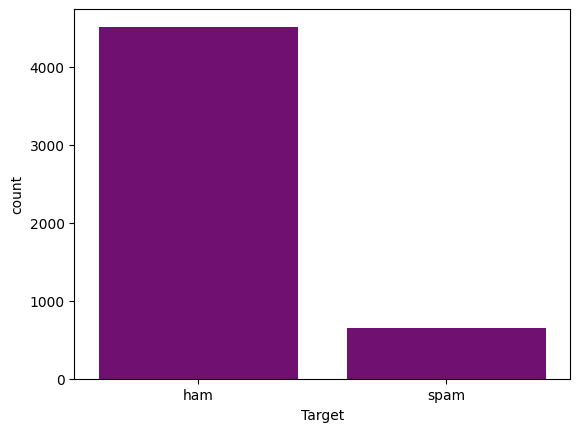

In [ ]:
ss.countplot(x='Target',data=df,color='purple')

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will Ì_ b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['Target']=df['Target'].map({'ham':1,'spam':0})
df

,Target,Text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,0,This is the 2nd time we have tried 2 contact u...
5165,1,Will Ì_ b going to esplanade fr home?
5166,1,"Pity, * was in mood for that. So...any other s..."
5167,1,The guy did some bitching but I acted like i'd...


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
messages=df.Text
messages

,Text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5164,This is the 2nd time we have tried 2 contact u...
5165,Will Ì_ b going to esplanade fr home?
5166,"Pity, * was in mood for that. So...any other s..."
5167,The guy did some bitching but I acted like i'd...


In [ ]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
messages=messages.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
messages

,Text
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I don't think he goes to usf , he lives ar..."
...,...
5164,This is the 2nd time we have tried 2 contact u...
5165,Will Ì_ b going to esplanade fr home ?
5166,"Pity , * was in mood for that . So ... any oth..."
5167,The guy did some bitching but I acted like i'd...


In [ ]:
messages=messages.str.replace('[^a-zA-Z0-9]+',' ')
messages

,Text
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I don't think he goes to usf , he lives ar..."
...,...
5164,This is the 2nd time we have tried 2 contact u...
5165,Will Ì_ b going to esplanade fr home ?
5166,"Pity , * was in mood for that . So ... any oth..."
5167,The guy did some bitching but I acted like i'd...


In [ ]:
from nltk.tokenize import word_tokenize
messages=messages.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
messages

,Text
0,until jurong point crazy Available only bugis ...
1,lar ... Joking wif oni ...
2,Free entry wkly comp win Cup final tkts 21st M...
3,dun say early hor ... already then say ...
4,Nah n't think goes usf lives around here though
...,...
5164,This the 2nd time have tried contact have won ...
5165,Will going esplanade home
5166,Pity was mood for that ... any other suggestions
5167,The guy did some bitching but acted like inter...


In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
messages=messages.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
messages

,Text
0,until jurong point crazi avail onli bugi great...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi then say ...
4,nah n't think goe usf live around here though
...,...
5164,this the 2nd time have tri contact have won th...
5165,will go esplanad home
5166,piti was mood for that ... ani other suggest
5167,the guy did some bitch but act like interest b...


In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
messages=messages.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
messages

,Text
0,jurong point crazi avail onli bugi great world...
1,lar ... joke wif oni ...
2,free entri wkli comp win cup final tkts 21st m...
3,dun say earli hor ... alreadi say ...
4,nah n't think goe usf live around though
...,...
5164,2nd time tri contact 750 pound prize claim eas...
5165,go esplanad home
5166,piti mood ... ani suggest
5167,guy bitch act like interest buy someth els nex...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(messages)
print(train_data)

  (0, 6716)	0.2013867907734348
  (0, 1032)	0.36428440102840937
  (0, 3009)	0.16860510866118522
  (0, 1803)	0.3072698363754341
  (0, 1570)	0.3476087098699431
  (0, 6888)	0.254303847590084
  (0, 3047)	0.20298416882662984
  (0, 1572)	0.3072698363754341
  (0, 4570)	0.17656501591101745
  (0, 1219)	0.2787625540489465
  (0, 2007)	0.28141685012718554
  (0, 4872)	0.24898971602827166
  (0, 3613)	0.36428440102840937
  (1, 4568)	0.5876124738684758
  (1, 6812)	0.46013546659668464
  (1, 3582)	0.5015445268614889
  (1, 3746)	0.4375385931655701
  (2, 78)	0.2720465433280081
  (2, 1104)	0.1888721380891482
  (2, 5126)	0.1888721380891482
  (2, 6452)	0.14177944934091913
  (2, 5888)	0.22946823036866862
  (2, 5083)	0.1899133822271452
  (2, 5164)	0.18081394491232577
  (2, 792)	0.25959318511541646
  :	:
  (5164, 4992)	0.212579004789552
  (5164, 4754)	0.22824526799739392
  (5164, 4570)	0.1743943177600958
  (5165, 2530)	0.7817835348926222
  (5165, 2971)	0.43937050009107986
  (5165, 3248)	0.4424568546429253
  (516

In [ ]:
train_data.shape

(5169, 7041)

In [ ]:
y=df['Target'].values
y

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
train_data=train_data.toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=0)
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

**CLASSIFICATION MODEL TRAINING AND EVALUATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
naive=GaussianNB()
svm_model=SVC()
tree=DecisionTreeClassifier(criterion='entropy')
lst=[knn,naive,svm_model,tree]

In [ ]:
for i in lst:
  print(i,'Model')
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(y_pred)
  print("Accuracy_score :")
  print(accuracy_score(y_test,y_pred))

KNeighborsClassifier(n_neighbors=7) Model
[1 1 1 ... 1 1 1]
Accuracy_score :
0.8800773694390716
GaussianNB() Model
[1 1 1 ... 1 1 1]
Accuracy_score :
0.8697614442295294
SVC() Model
[1 1 1 ... 1 1 1]
Accuracy_score :
0.9638942617666022
DecisionTreeClassifier(criterion='entropy') Model
[1 1 1 ... 1 1 1]
Accuracy_score :
0.9587362991618311


In [ ]:
with open('model1.pkl', 'wb') as file:
    pickle.dump(svm_model, file)